In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
from PIL import Image
# from IPython.display import display

In [3]:
#/home/dawidkubicki/Datasets/CATS_DOGS

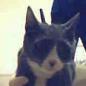

In [4]:
with Image.open('/home/dawidkubicki/Datasets/CATS_DOGS/test/CAT/10107.jpg') as im:
    display(im)

In [5]:
path = "/home/dawidkubicki/Datasets/CATS_DOGS"
img_names = []

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'/'+img)

In [7]:
len(img_names)

24994

In [8]:
img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
            
    except:
        rejected.append(item)

/home/dawidkubicki/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
/home/dawidkubicki/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
/home/dawidkubicki/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
/home/dawidkubicki/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
/home/dawidkubicki/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
 

In [10]:
print(len(img_sizes))
print(len(rejected))

24994
0


In [11]:
df = pd.DataFrame(img_sizes)

In [14]:
df[0].describe()

count    24994.000000
mean       404.493518
std        108.941802
min         42.000000
25%        323.000000
50%        448.000000
75%        500.000000
max        500.000000
Name: 0, dtype: float64

In [15]:
df[1].describe()

count    24994.000000
mean       361.037129
std         96.936811
min         33.000000
25%        302.000000
50%        375.000000
75%        421.000000
max        500.000000
Name: 1, dtype: float64

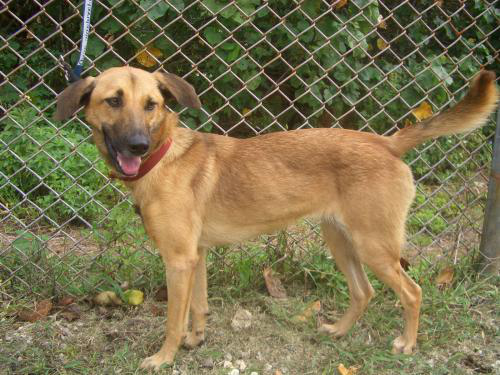

In [48]:
dog = Image.open(img_names[111])
display(dog)

In [49]:
dog.size

(500, 375)

In [50]:
dog.getpixel((0,0)) # 0 --- 255

(189, 179, 170)

In [51]:
transform = transforms.Compose([
    transforms.ToTensor()
])

im = transform(dog)
print(type(im))
print(im.shape)

<class 'torch.Tensor'>
torch.Size([3, 375, 500])


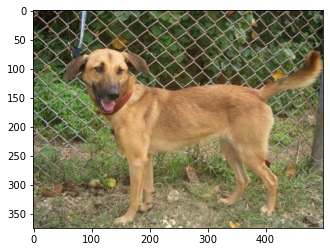

In [53]:
# (375.500,3)
# (1,2,0)
plt.imshow(np.transpose(im.numpy(), (1,2,0)))

In [57]:
np.array([189,179,170]) / 255 #that's how pytorch is gonna see it

array([0.74117647, 0.70196078, 0.66666667])

In [59]:
im[:,0,0]

tensor([0.7412, 0.7020, 0.6667])

<class 'torch.Tensor'>
torch.Size([3, 250, 250])


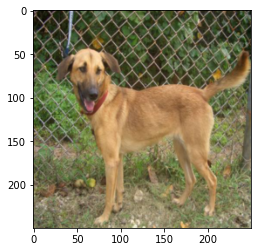

In [68]:
transform = transforms.Compose([
    transforms.Resize((250,250)),
    transforms.CenterCrop(250),
    transforms.ToTensor()
])

im = transform(dog)
print(type(im))
print(im.shape)

plt.imshow(np.transpose(im.numpy(), (1,2,0)))

<class 'torch.Tensor'>
torch.Size([3, 375, 500])


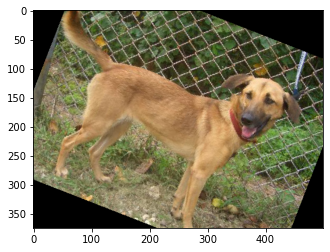

In [97]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(30),
    transforms.ToTensor()
])

im = transform(dog)
print(type(im))
print(im.shape)

plt.imshow(np.transpose(im.numpy(), (1,2,0)))

<class 'torch.Tensor'>
torch.Size([3, 224, 224])


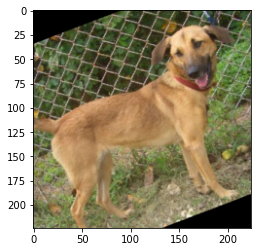

In [98]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),  # normally we'd set p=0.5
    transforms.RandomRotation(30),
    transforms.Resize(224),
    transforms.CenterCrop(224), 
    transforms.ToTensor()
])

im = transform(dog)
print(type(im))
print(im.shape)

plt.imshow(np.transpose(im.numpy(), (1,2,0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'torch.Tensor'>
torch.Size([3, 375, 500])


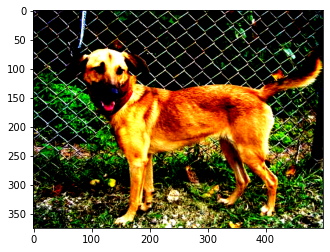

In [99]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

im = transform(dog)
print(type(im))
print(im.shape)

plt.imshow(np.transpose(im.numpy(), (1,2,0)))